# Full-circle Atomistic Comparison ETS

## Experimental data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import facets_drivers
import os
user = os.environ.get('USER')

experimental_structure = f"/data/id01/inhouse/{user}/scratch/ewoks_01_experiment/S37_structural_properties.vti"
simulation_dump_directory = f"/data/id01/inhouse/{user}/scratch/ewoks_03_simulation/"
facets_dump_directory = f"/data/id01/inhouse/{user}/scratch/ewoks_04_facets/"

In [3]:
from ewoks import execute_graph

In [4]:
nodes = [
    {
        "id": "fc_analysis",
        "task_type": "class",
        "task_identifier": "facets_drivers.theory.FullCircleAnalysis",
    },
    {
        "id": "fc_analysis_sim",
        "task_type": "class",
        "task_identifier": "facets_drivers.theory.FullCircleAnalysis",
    }
]

workflow = {"graph": {"id": "hello_world"}, "nodes": nodes}

inputs = [
    {"id": "fc_analysis", "name": "scratch_dirpath", "value": facets_dump_directory},
    {"id": "fc_analysis", "name": "vti_filepath", "value": experimental_structure},

    {"id": "fc_analysis_sim", "name": "scratch_dirpath", "value": facets_dump_directory},
    {"id": "fc_analysis_sim", "name": "xyz_filepath", "value": f"{simulation_dump_directory}/exp_minimized.xyz"},
]

In [7]:
%matplotlib inline

--- Running in Experimental Mode ---
Reading VTI data from: /data/id01/inhouse/polack/scratch/ewoks_01_experiment/S37_structural_properties.vti
  - Voxel Size (Spacing): [7.1231452  7.39548776 2.17563707]
  - Dimensions: (199, 199, 199)
  - Loaded array 'amplitude' with shape (199, 199, 199)
  - Loaded array 'displacement' with shape (199, 199, 199)
Calculating strain from experimental displacement...
Experimental data loaded and processed.
Plotting final results...
Saving figure to: pynx_run_combined_020.png


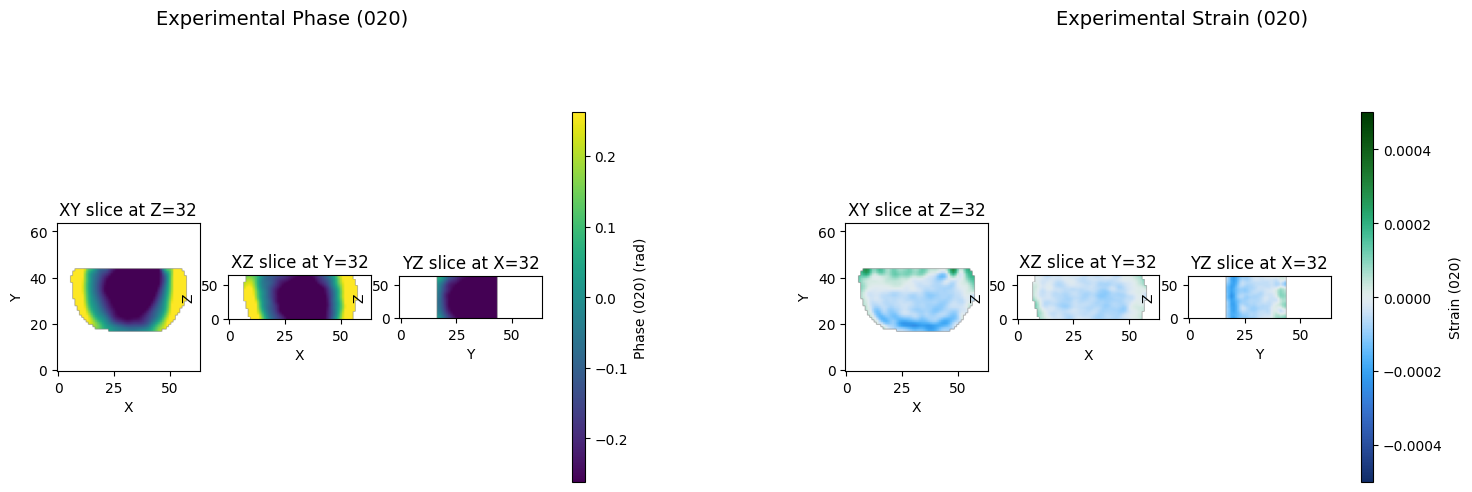

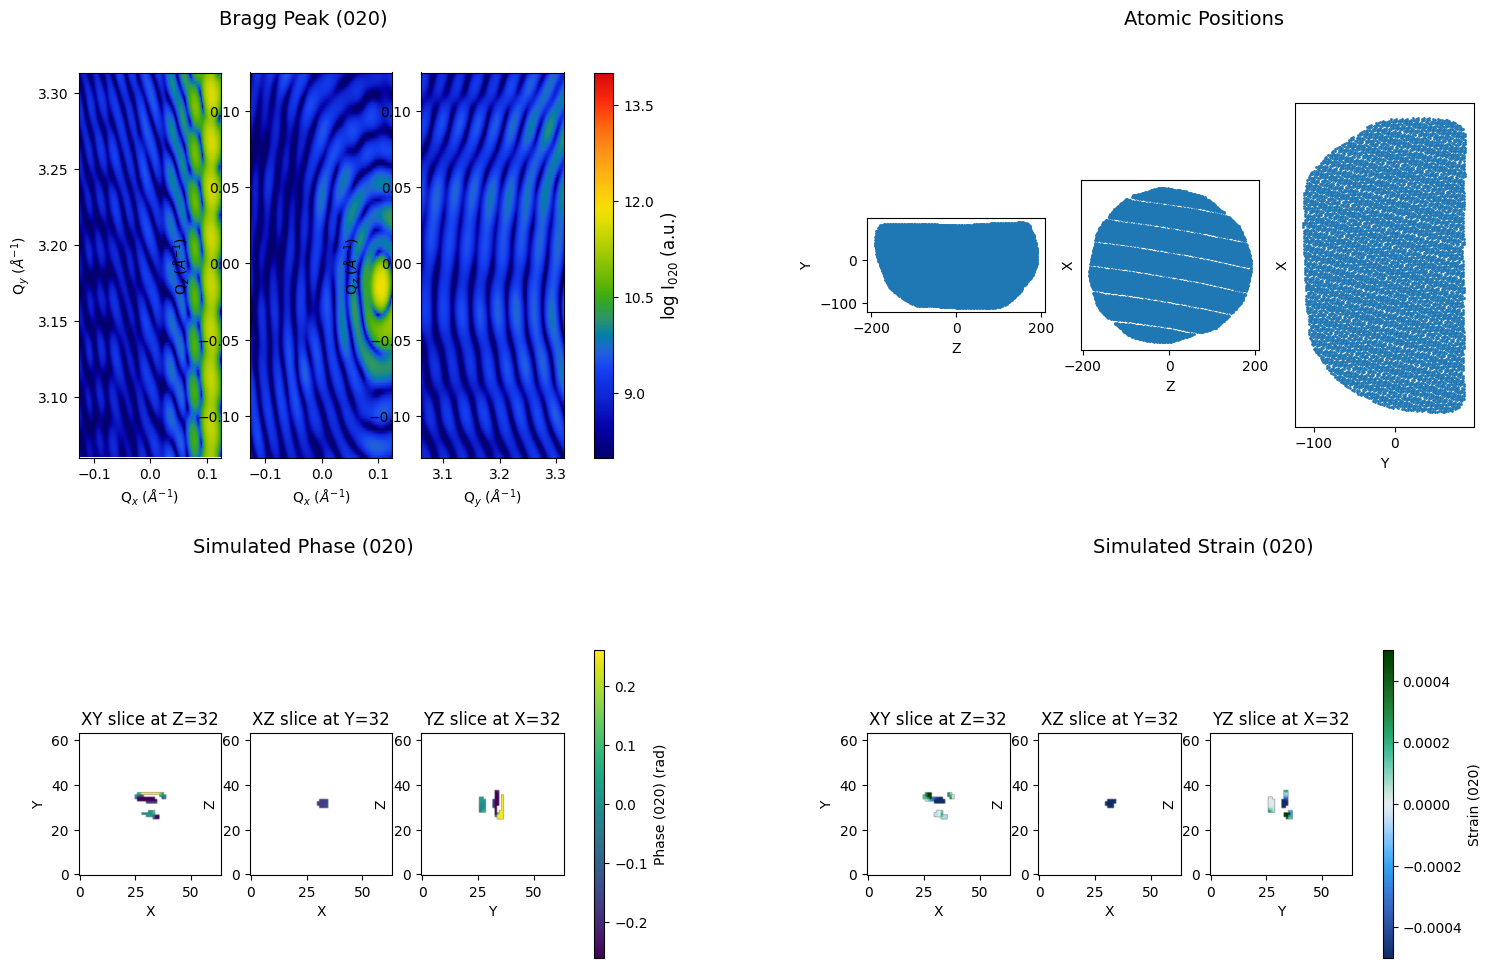

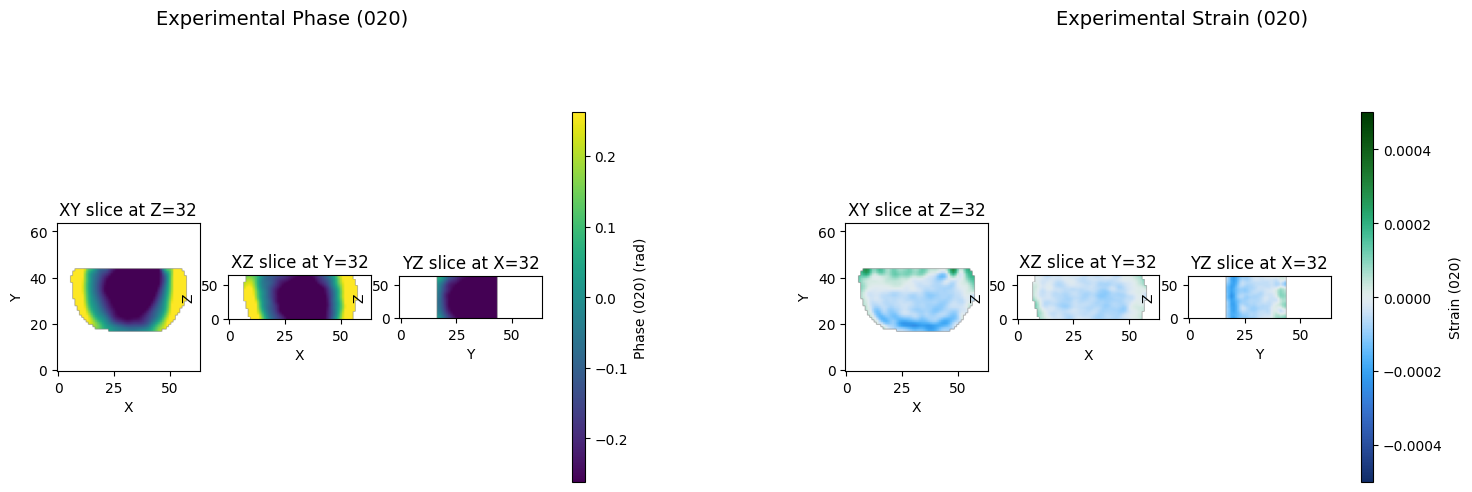

Script finished successfully.
--- Running in Simulation Mode ---
Euler angles (phi, theta, psi) in degrees:
4.032790996026037 -0.0724285610355806 2.056983607842733
Reading atomic positions from: /data/id01/inhouse/polack/scratch/ewoks_03_simulation/exp_minimized.xyz
Computing scattering...


In [ ]:
result = execute_graph(workflow, inputs=inputs)